## Python Correlation Project
#### Data Source : Kaggle

In [157]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (6,4)

In [158]:
df = pd.read_csv("C:/Users/Flex5/Desktop/Portfolio/Project - 5 Python Correlation/mutual_funds_data.csv")

In [159]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Quant Small Cap Fund,1000,5000,0.64,3301.0,10,Sanjeev Sharma,0.03,1.30,0.92,0.03,6,Quant Mutual Fund,5,Equity,Small Cap Mutual Funds,5.4,71.4,23.2
1,Quant Tax Plan- Direct Growth,500,500,0.57,2779.0,10,Vasav Sahgal,0.01,1.21,0.99,0.02,6,Quant Mutual Fund,5,Equity,ELSS Mutual Funds,0.9,54.9,22.2
2,Quant Infrastructure Fund,1000,5000,0.64,822.0,10,Vasav Sahgal,0.02,1.33,1.02,0.02,6,Quant Mutual Fund,5,Equity,Sectoral / Thematic Mutual Funds,5.6,61.5,21.1
3,Canara Robeco Small Cap Fund,1000,5000,0.47,4831.0,4,Shridatta Bhandwaldar,0.00,0.92,0.70,0.01,6,Canara Robeco Mutual Fund,5,Equity,Small Cap Mutual Funds,-0.6,51.8,NaN
4,PGIM India Midcap Opportunities Fund,1000,5000,0.46,7707.0,9,Aniruddha Naha,0.00,0.95,0.75,0.01,6,PGIM India Mutual Fund,5,Equity,Mid Cap Mutual Funds,2.0,42.9,19.0


In [160]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,957.000000,804.000000
mean,454.242331,2932.861963,0.639908,3244.714959,7.843558,0.002219,0.505603,0.387464,0.040256,4.197342,2.267894,4.429755,19.078788,10.197512
std,386.174317,2572.360738,0.503155,6694.025785,2.796229,0.023599,0.499408,0.389169,0.085295,1.784418,1.633143,6.516360,11.858213,3.702803
min,0.000000,0.000000,0.000000,2.380000,1.000000,-0.070000,0.010000,-0.100000,-0.280000,0.000000,0.000000,-19.700000,3.300000,-4.100000
25%,100.000000,500.000000,0.230000,130.250000,5.000000,0.000000,0.060000,0.010000,0.000000,3.000000,0.250000,1.700000,6.800000,7.000000
50%,500.000000,5000.000000,0.540000,604.500000,10.000000,0.000000,0.410000,0.245000,0.020000,4.000000,3.000000,4.500000,17.700000,10.400000
75%,500.000000,5000.000000,0.990000,3000.500000,10.000000,0.010000,0.910000,0.790000,0.050000,6.000000,3.000000,5.800000,28.200000,13.300000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,0.500000,7.770000,1.100000,0.330000,6.000000,5.000000,130.800000,71.400000,23.200000


In [161]:
df = df[df['returns_5yr'].notnull()]

In [180]:
df.drop_duplicates(inplace = True)

In [182]:
df.drop(['min_sip', 'min_lumpsum'], inplace = True, axis = 1)

In [184]:
df.describe()

,expense_ratio,fund_size_cr,fund_age_yr,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,803.000000,803.00000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,0.666239,3621.52203,8.707347,0.002864,0.514259,0.389016,0.034458,4.278954,2.244085,4.659278,19.402864,10.196389
std,0.512839,7202.28329,2.271538,0.024834,0.513581,0.391342,0.076286,1.706491,1.661565,6.868772,11.652672,3.704974
min,0.000000,2.38000,1.000000,-0.070000,0.010000,-0.100000,-0.280000,0.000000,0.000000,-19.700000,3.300000,-4.100000
25%,0.250000,139.00000,8.000000,0.000000,0.060000,0.010000,-0.005000,3.000000,0.000000,1.700000,7.100000,7.000000
50%,0.580000,685.00000,10.000000,0.000000,0.430000,0.240000,0.010000,4.000000,3.000000,4.500000,17.900000,10.400000
75%,1.020000,3511.50000,10.000000,0.010000,0.910000,0.800000,0.040000,6.000000,4.000000,6.400000,28.900000,13.300000
max,2.590000,57052.00000,17.000000,0.500000,7.770000,1.070000,0.330000,6.000000,5.000000,130.800000,71.400000,23.200000


In [211]:
#Before diving into pure statistics, we make this exercise a bit fun, I will try to predict some correlations and check the
#results at the ending.
#Prediction 1 : alpha should be highly correlated to returns
#Prediction 2 : manager managing high fund should be correlated to the returns 
#Prediction 3 : amc's correlation with returns

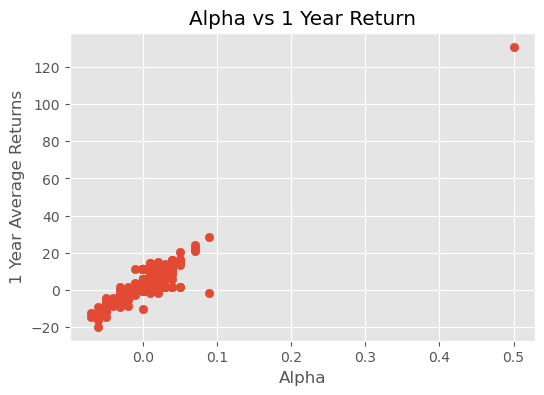

In [186]:
#Scatter plot of "alpha vs 1 year returns" using matplotlib 
plt.scatter(x = df['alpha'], y = df['returns_1yr'])
plt.title('Alpha vs 1 Year Return')
plt.xlabel('Alpha')
plt.ylabel('1 Year Average Returns')
plt.show()

<AxesSubplot:xlabel='alpha', ylabel='returns_1yr'>

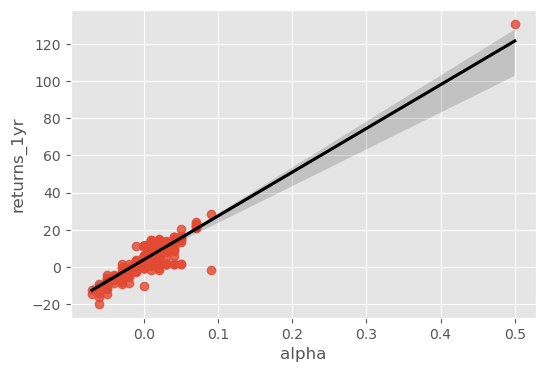

In [187]:
#The correlation is visible but to consolidate our findings we will use regression plot from seaborn
sns.regplot(data = df, x = 'alpha', y= 'returns_1yr', line_kws = {'color':'black'})

In [188]:
#Seaborn graph gave more insights, now to find correlations for all variable we will use pandas' in-build correlation method

In [189]:
#Since most of the data is continuous we will use default pearson method
corr_data = df.corr().round(2)
corr_data

,expense_ratio,fund_size_cr,fund_age_yr,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
expense_ratio,1.00,-0.03,0.33,0.06,0.58,0.61,-0.25,0.60,0.03,-0.12,0.39,-0.00
fund_size_cr,-0.03,1.00,0.24,-0.01,0.01,0.08,0.28,0.06,0.28,-0.05,-0.02,-0.04
fund_age_yr,0.33,0.24,1.00,0.00,0.23,0.27,0.11,0.24,0.53,-0.17,-0.07,-0.38
alpha,0.06,-0.01,0.00,1.00,0.36,-0.05,0.20,-0.01,0.16,0.85,0.13,-0.03
sd,0.58,0.01,0.23,0.36,1.00,0.75,-0.24,0.75,0.03,0.11,0.59,0.24
beta,0.61,0.08,0.27,-0.05,0.75,1.00,-0.27,0.89,0.08,-0.29,0.70,0.35
sharpe,-0.25,0.28,0.11,0.20,-0.24,-0.27,1.00,-0.30,0.19,0.17,-0.23,-0.29
risk_level,0.60,0.06,0.24,-0.01,0.75,0.89,-0.30,1.00,0.04,-0.20,0.65,0.38
rating,0.03,0.28,0.53,0.16,0.03,0.08,0.19,0.04,1.00,0.08,-0.14,-0.22
returns_1yr,-0.12,-0.05,-0.17,0.85,0.11,-0.29,0.17,-0.20,0.08,1.00,-0.15,-0.05


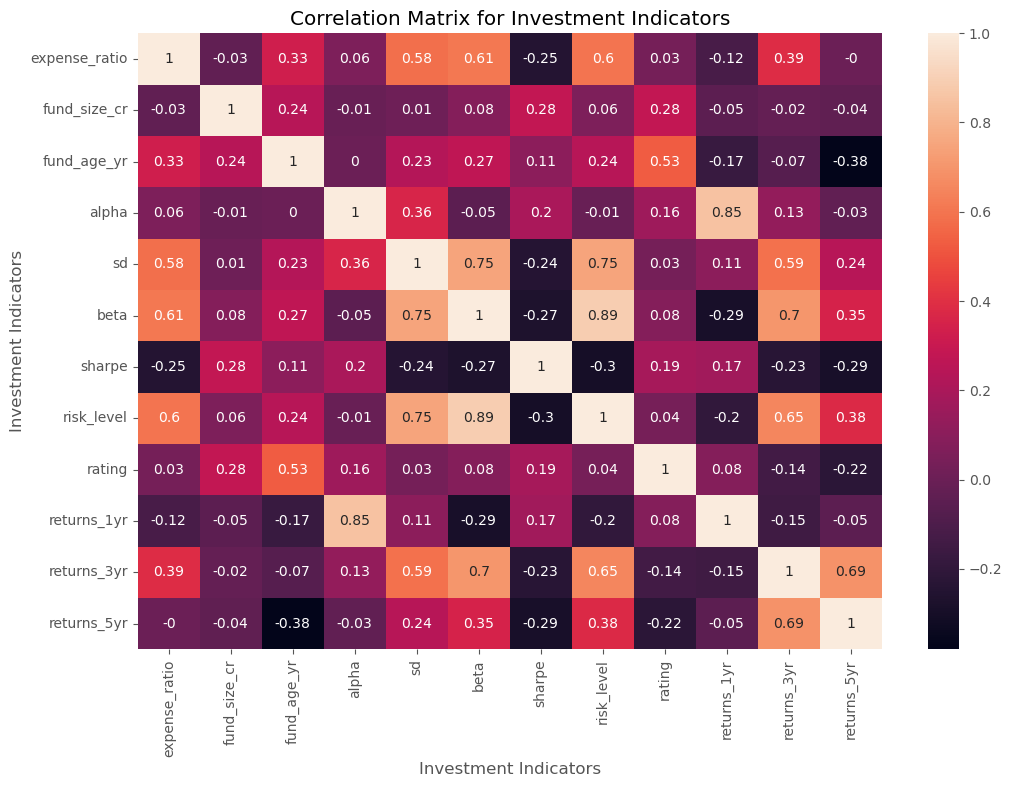

In [190]:
#Data Visualization in the form of heat map seems a great alternative to numeric data.
plt.figure(figsize = (12,8))

sns.heatmap(corr_data,annot=True)
plt.title('Correlation Matrix for Investment Indicators')
plt.xlabel('Investment Indicators')
plt.ylabel('Investment Indicators')
plt.show()

In [191]:
#Looking on heatmap, we can infer prediction 1 was true (atleast partially) for year1, but not so much for 3 years and 5 years,
#Here are some more crucial inference from the data:
#1. Higher alpha means higher returns but for 1 year time frame (A poor indicator of success for long term)
#2. Funds with higher standard deviation (more volatile) performs better in 3 years frame
#3. Funds with higher sharpe tends to perform better in 1 year frame but in long run higher risk is necessary for better returns
#4. Funds that peformed better in 3 years are likely to perform well in 5 years as well
#5. Funds with higher Beta are liekly to be successfull mid-term 
#6. Age of fund has little to no correlation with returns (Should not factor this in decision making)
#7. Size of fund has negligible effect on returns
#8. Ratings of a fund has negative correlation in long term

In [170]:
#Now we will work on prediction 2

In [194]:
agg = {col:'mean' for col in df.corr().columns}
agg['fund_size_cr'] ='sum'
agg['fund_age_yr'] = 'max'

In [204]:
manager_analysis = df.groupby('fund_manager').agg(agg).sort_values(by = 'fund_size_cr', ascending = False)
manager_analysis.rename(columns = {'fund_size_cr':'total_fund_size', 'fund_age_yr':'max_experience'}, inplace = True)

In [207]:
manager_analysis.corrwith(manager_analysis['total_fund_size']).round(2)

expense_ratio     -0.09
total_fund_size    1.00
max_experience     0.10
alpha              0.02
sd                -0.10
beta              -0.04
sharpe             0.11
risk_level        -0.02
rating             0.10
returns_1yr        0.03
returns_3yr        0.02
returns_5yr        0.11
dtype: float64

In [210]:
#Prediction 2 seems to be not true, there's almost no correlation of 1year, 3year, 5year returns with total fund managed by
#an indiviual

In [214]:
#Time for last prediction (amc vs returns), for this we need to convert the text data of AMC into numbers

In [215]:
df_numerized = df.copy()

In [305]:
df_numerized['amc_name'] = df_numerized['amc_name'].astype('category')
df_numerized['amc_name'] = df_numerized['amc_name'].cat.codes
corr_amc = df_numerized.corrwith(df_numerized['amc_name']).round(2)
corr_amc = corr_amc[corr_amc != 1]

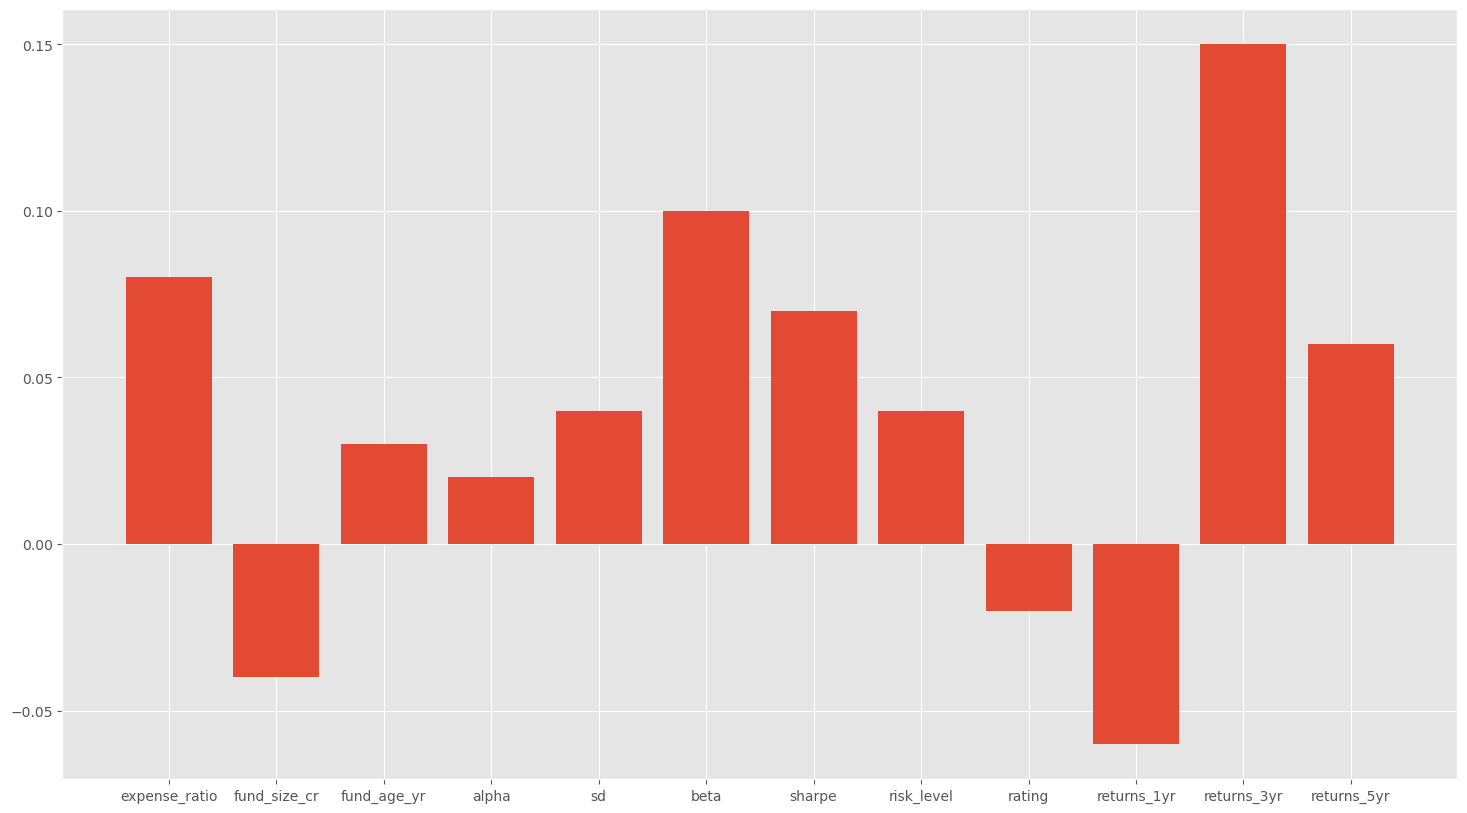

In [327]:
plt.figure(figsize = (18,10))
plt.bar(corr_amc.index, corr_amc.values)
plt.show()

In [222]:
#Prediction 3 also seems to be partially true especially on longer time frames. 

In [223]:
#Now we summarize our report by finding the highly correlated pairs. We have to convert all categorical values in numerical

In [224]:
df_summary = df.copy()

In [225]:
df_summary.dtypes

scheme_name       object
expense_ratio    float64
fund_size_cr     float64
fund_age_yr        int64
fund_manager      object
alpha            float64
sd               float64
beta             float64
sharpe           float64
risk_level         int64
amc_name          object
rating             int64
category          object
sub_category      object
returns_1yr      float64
returns_3yr      float64
returns_5yr      float64
dtype: object

In [230]:
for col in df_summary.columns:
    if df_summary[col].dtypes == 'object':
        df_summary[col] = df_summary[col].astype('category')
        df_summary[col] = df_summary[col].cat.codes
df_summary.head()    

,scheme_name,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,592,0.64,3301.0,10,199,0.03,1.30,0.92,0.03,6,28,5,1,35,5.4,71.4,23.2
1,593,0.57,2779.0,10,237,0.01,1.21,0.99,0.02,6,28,5,1,11,0.9,54.9,22.2
2,587,0.64,822.0,10,237,0.02,1.33,1.02,0.02,6,28,5,1,33,5.6,61.5,21.1
4,579,0.46,7707.0,9,32,0.00,0.95,0.75,0.01,6,26,5,1,27,2.0,42.9,19.0
5,590,0.63,1550.0,10,199,0.04,1.21,0.91,0.04,6,28,5,1,27,8.8,45.1,19.8


In [271]:
corr_data = df_summary.corr()
corr_pairs = corr_data.unstack()
high_corr_pairs = corr_pairs[abs(corr_pairs) > .4].sort_values(ascending = False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]
high_corr_pairs = high_corr_pairs.drop_duplicates()

In [270]:
#Here's the summary of the stats, some of the correlation like (risk_level - beta), (sd - risk_level) are obvious from data
#as well as logic, one of the key correlation is the relation between beta and 3 year returns, it should be included in the 
#decision making process, also some cliche assumptions like age of fund, experience of manager, and fund size has little to 
#affect on short term as well as long term returns